In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Research Projects/Retraction/data/"
img = "/content/drive/MyDrive/Research Projects/Retraction/images/"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Organize data for baseline (Figure 2 a)

In [32]:
df = pd.read_csv(path+"RW_authors_matched_on_earlycareer_confounders_filteredSample_6.csv")
df['dist'] = (((df.numCollabsRetYear-df.numCollabs)**2)*0.85 + ((df.numPubsRetYear - df.numPubs)**2)*0.15)**0.5

ret = pd.read_csv(path+"RW_authors_w_confounders_filteredSample_postNHB.csv", usecols=['nRetracted','MAGAID','AltmetricScoreAtRetraction'])
ret = ret.drop_duplicates()
ret = ret[ret.nRetracted==1]
ret = ret[['MAGAID','AltmetricScoreAtRetraction']]
ret.columns = ['RetAID','AltScore']

df = df.merge(ret, on="RetAID")

#if pair matches more than once (due to multiple field matches for example), then count only once
df = df.drop_duplicates(subset=['RetAID','AID'])

#get match with shortest "distance"
min = df[["RetAID",'dist']].sort_values(by=["RetAID",'dist'], ascending=True)
min = min.drop_duplicates(subset=['RetAID'], keep='first')
df = df.merge(min, on=["RetAID",'dist'])

#calculate career age of retracted author and its match
df['Career_Age'] = df['YearOfAttrition']-df['FirstPubYear']
df.loc[df.YearOfAttrition==-1, 'Career_Age'] = -1
df['Ret_Career_Age'] = df['RetYearOfAttrition']-df['FirstPubYear']
df.loc[df.RetYearOfAttrition==-1, 'Ret_Career_Age'] = -1

rand = df.sample(frac=1).drop_duplicates(subset=['RetAID'], keep="first")
data = rand[['RetAID','Ret_Career_Age']].copy()
data = data.sort_values(by='RetAID').reset_index(drop=True)

#randomly select a match 100 times
for i in range(1,1000):
  rand = df.sample(frac=1).drop_duplicates(subset=['RetAID'], keep="first")
  rand = rand.sort_values(by='RetAID').reset_index(drop=True)
  data = pd.concat([data,rand.Career_Age], axis=1, join="inner")
  data = data.rename(columns={'Career_Age':'Career_Age'+str(i)})

data.head(10)

,RetAID,Ret_Career_Age,Career_Age1,Career_Age2,Career_Age3,Career_Age4,Career_Age5,Career_Age6,Career_Age7,Career_Age8,...,Career_Age990,Career_Age991,Career_Age992,Career_Age993,Career_Age994,Career_Age995,Career_Age996,Career_Age997,Career_Age998,Career_Age999
0,8197726,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,24132859,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,...,0.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0
2,24706373,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,26562934,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,31866983,-1.0,-1.0,3.0,-1.0,0.0,1.0,0.0,0.0,1.0,...,-1.0,0.0,3.0,3.0,-1.0,0.0,-1.0,-1.0,0.0,0.0
5,41960302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,48750469,5.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
7,62104001,-1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
8,68442703,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,95132420,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [33]:
#convert age data to cumulative to plot
cumulative = data.Ret_Career_Age.value_counts(normalize=True).reset_index().sort_values(by="Ret_Career_Age").reset_index(drop=True).rename(columns={"Ret_Career_Age":"Career_Age","proportion":"Ret_proportion"})

for i in range(1,1000):
  cumulative2 = data['Career_Age'+str(i)].value_counts(normalize=True).reset_index().sort_values(by="Career_Age"+str(i)).reset_index(drop=True).rename(columns={"Career_Age"+str(i):"Career_Age","proportion":"proportion"+str(i)})
  cumulative = cumulative.merge(cumulative2, on="Career_Age", how="outer").sort_values(by="Career_Age").reset_index(drop=True)

cumulative.loc[cumulative.Career_Age==-1,'Career_Age']=np.nan

cumulative.iloc[:,1:] = cumulative.iloc[:,1:].fillna(0)

cumulative = cumulative.sort_values(by="Career_Age",na_position='first',ascending=False).reset_index(drop=True)

cumulative.iloc[:,1:] = cumulative.iloc[:,1:].cumsum()*100

cumulative = cumulative.sort_values(by="Career_Age",na_position='last',ascending=True).reset_index(drop=True)

cumulative['avg_proportion'] = cumulative.iloc[:,2:].mean(axis=1)
cumulative['std_proportion'] = cumulative.iloc[:,2:].std(axis=1)

cumulative

,Career_Age,Ret_proportion,proportion1,proportion2,proportion3,proportion4,proportion5,proportion6,proportion7,proportion8,...,proportion992,proportion993,proportion994,proportion995,proportion996,proportion997,proportion998,proportion999,avg_proportion,std_proportion
0,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.195493e-14
1,1.0,54.101349,55.814801,55.377324,56.106453,55.195042,55.960627,55.158585,53.408677,54.356544,...,54.320087,55.267955,54.830478,55.012760,55.231498,55.377324,56.252279,55.122129,55.071769,6.292909e-01
2,2.0,44.513307,47.903755,47.502734,47.940211,48.158950,47.903755,47.685016,46.008020,46.810062,...,46.846518,47.393365,47.356908,47.101713,47.685016,48.268319,48.815166,47.356908,47.417195,6.155972e-01
3,3.0,38.753190,42.982136,42.070725,42.508203,42.289464,41.924900,42.253008,40.576012,41.596792,...,41.560335,41.450966,41.851987,41.961356,42.216551,42.544659,43.310244,42.034269,41.827135,5.869984e-01
4,4.0,34.815895,38.789646,37.805323,38.206343,37.951148,37.951148,37.914692,36.456435,37.477215,...,37.367845,37.550128,37.841779,37.805323,37.987605,38.279256,38.971929,37.805323,37.702121,5.619615e-01
5,5.0,31.826467,36.091870,35.435654,35.873132,35.545024,35.654393,35.508567,34.159679,35.180459,...,34.961721,34.888808,35.399198,35.617937,35.472111,35.946044,36.383522,35.289829,35.333292,5.388917e-01
6,6.0,30.586949,34.159679,33.175355,33.795115,33.868028,33.685746,33.394094,31.935837,33.138899,...,33.102443,32.883704,33.321181,33.758658,33.503463,34.159679,34.451331,33.430550,33.338296,5.254187e-01
7,7.0,29.128691,32.993073,32.227488,32.592052,33.065986,32.737878,32.300401,31.024426,32.227488,...,32.118119,31.717098,32.409770,32.628509,32.737878,33.138899,33.539920,32.519140,32.288395,5.094595e-01
8,8.0,28.071455,32.081662,31.279621,31.753555,32.227488,31.899380,31.461903,30.258841,31.352534,...,31.279621,30.769231,31.607729,31.717098,31.935837,32.191032,32.810791,31.717098,31.425957,4.995350e-01
9,9.0,27.633977,31.680642,30.732774,31.352534,31.753555,31.534816,30.915057,29.930733,30.915057,...,30.769231,30.331754,31.060882,31.206708,31.571272,31.862924,32.409770,31.243164,30.983627,4.988595e-01


In [ ]:
def create_cum_data(df):
  rand = df.sample(frac=1).drop_duplicates(subset=['RetAID'], keep="first")
  data = rand[['RetAID','Ret_Career_Age']].copy()
  data = data.sort_values(by='RetAID').reset_index(drop=True)

  for i in range(1,1000):
    rand = df.sample(frac=1).drop_duplicates(subset=['RetAID'], keep="first")
    rand = rand.sort_values(by='RetAID').reset_index(drop=True)
    data = pd.concat([data,rand.Career_Age], axis=1, join="inner")
    data = data.rename(columns={'Career_Age':'Career_Age'+str(i)})

  return data

def create_cumulative_df(data):
  cumulative = data.Ret_Career_Age.value_counts(normalize=True).reset_index().sort_values(by="Ret_Career_Age").reset_index(drop=True).rename(columns={"Ret_Career_Age":"Career_Age","proportion":"Ret_proportion"})

  for i in range(1,1000):
    cumulative2 = data['Career_Age'+str(i)].value_counts(normalize=True).reset_index().sort_values(by="Career_Age"+str(i)).reset_index(drop=True).rename(columns={"Career_Age"+str(i):"Career_Age","proportion":"proportion"+str(i)})
    cumulative = cumulative.merge(cumulative2, on="Career_Age", how="outer").sort_values(by="Career_Age").reset_index(drop=True)

  cumulative.loc[cumulative.Career_Age==-1,'Career_Age']=np.nan

  cumulative.iloc[:,1:] = cumulative.iloc[:,1:].fillna(0)

  cumulative = cumulative.sort_values(by="Career_Age",na_position='first',ascending=False).reset_index(drop=True)

  cumulative.iloc[:,1:] = cumulative.iloc[:,1:].cumsum()*100

  cumulative = cumulative.sort_values(by="Career_Age",na_position='last',ascending=True).reset_index(drop=True)

  cumulative['avg_proportion'] = cumulative.iloc[:,2:].mean(axis=1)
  cumulative['std_proportion'] = cumulative.iloc[:,2:].std(axis=1)

  return cumulative


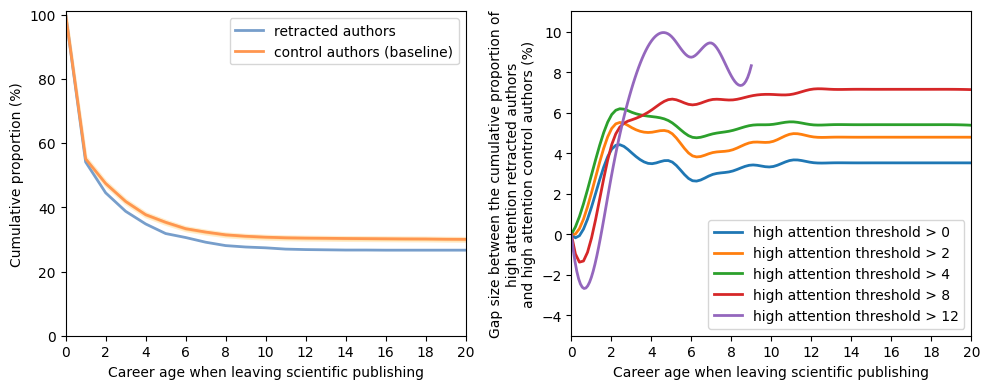

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

#Plot A
sns.lineplot(data=cumulative, x='Career_Age', y='Ret_proportion', label="retracted authors", ax=ax1, color='#779ecb', linewidth=2)
sns.lineplot(data=cumulative, x='Career_Age', y='avg_proportion', label="control authors (baseline)", ax=ax1, color='#ff964f', linewidth=2)
ax1.fill_between(cumulative.Career_Age, cumulative.avg_proportion - cumulative.std_proportion, cumulative.avg_proportion + cumulative.std_proportion, color='orange', alpha=0.2, linewidth=2)

ax1.legend()
ax1.set_ylim(0,101)
ax1.set_xlim(0,20)
ax1.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
ax1.set_xlabel("Career age when leaving scientific publishing")
ax1.set_ylabel("Cumulative proportion (%)")
ax1.annotate('a', xy=(-4, 100))


#Plot C
thresholds = [0,2,4,8,12]

for i,j in zip(thresholds,range(1,6)):
  #generate data
  high = df[df.AltScore>i]

  data_high = create_cum_data(high)

  cumulative_high = create_cumulative_df(data_high)

  diff = pd.DataFrame()
  diff['Career_Age'] = np.arange(0,cumulative_high.Career_Age.max()+1)
  diff = diff.merge(cumulative_high[['Career_Age','avg_proportion','Ret_proportion']], on='Career_Age', how='left')
  diff.ffill(inplace=True)
  diff['Proportion'] = diff['avg_proportion']-diff['Ret_proportion']

  #smooth
  age_smooth = np.linspace(diff.Career_Age.min(), diff.Career_Age.max(), 100)
  spl = make_interp_spline(diff.Career_Age, diff.Proportion, k=3)
  proportion_smooth = spl(age_smooth)

  #plot
  plt.plot(age_smooth, proportion_smooth, label="high attention threshold > "+str(i), linewidth=2)

  ax2.legend().set_visible(False)
  ax2.set_xlabel("")
  ax2.set_ylabel("")
  ax2.set_ylim(-5,11)
  ax2.set_xlim(0,20)
  ax2.set_xticks([0,2,4,6,8,10,12,14,16,18,20])

  plt.xlabel("Career age when leaving scientific publishing")
  plt.ylabel("Gap size between the cumulative proportion of\nhigh attention retracted authors\nand high attention control authors (%)")

  if j==5:
    ax2.legend()

plt.tight_layout()

plt.savefig(img+"fig2_a_c.pdf", format="pdf", bbox_inches='tight')